In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

## Import Data

In [2]:
#Set file path for train and test data
file_path = "C:/Users/ABHISHEK/Downloads/"
train_file_name = "train.csv"
test_file_name = "test.csv"
train_path = os.path.join(file_path,train_file_name)
test_path = os.path.join(file_path,test_file_name)

In [3]:
#read the data with all default parameters
#PassengerId is the unique parameter among all columns - Primary Key to be clear
train_df = pd.read_csv(train_path,index_col = "PassengerId")
test_df = pd.read_csv(test_path,index_col="PassengerId")

In [4]:
#get the type
type(train_df)

pandas.core.frame.DataFrame

## Basic Structure

In [5]:
# use .info() to get basic info about the dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [7]:
test_df["Survived"] = -888 #Setting arbitrary value for test data Survived column which is the target variable
                           #so that both train_df and test_df have similar structure

In [8]:
df = pd.concat((train_df,test_df),axis=0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [10]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450


In [11]:
df.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742


In [12]:
df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,-888,A.5. 3236
1306,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1,female,0,-888,PC 17758
1307,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,male,0,-888,SOTON/O.Q. 3101262
1308,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,3,male,0,-888,359309
1309,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,3,male,1,-888,2668


In [13]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
8                          Palsson, Master. Gosta Leonard
9       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                    Nasser, Mrs. Nicholas (Adele Achem)
11                        Sandstrom, Miss. Marguerite Rut
12                               Bonnell, Miss. Elizabeth
13                         Saundercock, Mr. William Henry
14                            Andersson, Mr. Anders Johan
15                   Vestrom, Miss. Hulda Amanda Adolfina
16                       Hewlett, Mrs. (Mary D Kingcome) 
17                                   Rice, Master. Eugene
18

In [14]:
df["Name"]

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
8                          Palsson, Master. Gosta Leonard
9       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                    Nasser, Mrs. Nicholas (Adele Achem)
11                        Sandstrom, Miss. Marguerite Rut
12                               Bonnell, Miss. Elizabeth
13                         Saundercock, Mr. William Henry
14                            Andersson, Mr. Anders Johan
15                   Vestrom, Miss. Hulda Amanda Adolfina
16                       Hewlett, Mrs. (Mary D Kingcome) 
17                                   Rice, Master. Eugene
18

In [15]:
df[['Name','Age']]

,Name,Age
PassengerId,,
1,"Braund, Mr. Owen Harris",22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Heikkinen, Miss. Laina",26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,"Allen, Mr. William Henry",35.0
6,"Moran, Mr. James",NaN
7,"McCarthy, Mr. Timothy J",54.0
8,"Palsson, Master. Gosta Leonard",2.0
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0


In [16]:
df.loc[5:10,]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female,1,1,237736


In [17]:
df.loc[5:10,'Age':'Pclass']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass
PassengerId,,,,,,,
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2


In [18]:
df.loc[5:10,['Survived','Fare','Embarked']]

,Survived,Fare,Embarked
PassengerId,,,
5,0,8.0500,S
6,0,8.4583,Q
7,0,51.8625,S
8,0,21.0750,S
9,1,11.1333,S
10,1,30.0708,C


In [19]:
df.iloc[5:10,3:8]

,Fare,Name,Parch,Pclass,Sex
PassengerId,,,,,
6,8.4583,"Moran, Mr. James",0,3,male
7,51.8625,"McCarthy, Mr. Timothy J",0,1,male
8,21.0750,"Palsson, Master. Gosta Leonard",1,3,male
9,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female
10,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female


In [20]:
# filter rows based on condition
male_passengers = df.loc[df.Sex=='male',:]
print("Number of male passengers : {0}".format(len(male_passengers)))

Number of male passengers : 843


In [21]:
# use & or | for complex logic
male_passengers_first_class = df.loc[((df.Sex=='male') & (df.Pclass==1)),:]
print("Number of male passengers in first class : {0}".format(len(male_passengers_first_class)))

Number of male passengers in first class : 179


## Summary Statistics

In [22]:
# Use .describe() to get summary statistics of numeric columns
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-283.301757
std,14.413493,51.758668,0.865560,0.837836,1.041658,414.337413
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [23]:
# numerical feature
# centrality measure
print("Mean fare : {0}".format(df.Fare.mean())) #mean
print("Median fare : {0}".format(df.Fare.median())) #median

Mean fare : 33.2954792813
Median fare : 14.4542


In [24]:
# dispersion measures
print("Min fare : {0}".format(df.Fare.min())) #minimum
print("Max fare : {0}".format(df.Fare.max())) #maximum
print("Fare range : {0}".format(df.Fare.max() - df.Fare.min())) #range
print("25 percentile : {0}".format(df.Fare.quantile(.25))) #25 percentile
print("50 percentile : {0}".format(df.Fare.quantile(.5))) #50 percentile
print("75 percentile : {0}".format(df.Fare.quantile(.75))) #75 percentile
print("Variance fare : {0}".format(df.Fare.var())) #Variance
print("Standard deviation fare : {0}".format(df.Fare.std())) #Standard Deviation

Min fare : 0.0
Max fare : 512.3292
Fare range : 512.3292
25 percentile : 7.8958
50 percentile : 14.4542
75 percentile : 31.275
Variance fare : 2678.95973789
Standard deviation fare : 51.7586682392


In [25]:
%matplotlib inline

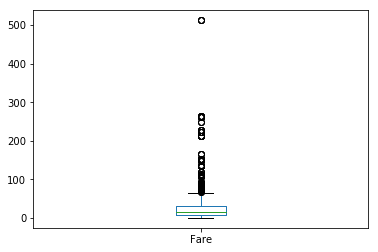

In [26]:
# box-whisker plot
df.Fare.plot(kind='box')

In [27]:
# use .describe(include='all') to get statistics for all columns including non-numeric columns
df.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-283.301757,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,414.337413,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-888.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-888.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [28]:
# categorical column: Counts
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [29]:
# categorical column: Proportions
df.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [30]:
# apply on other columns
df[df.Survived!=-888].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [31]:
# count: Passenger class
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

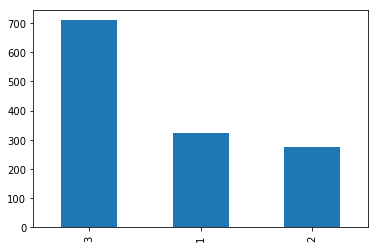

In [32]:
# visualize counts
df.Pclass.value_counts().plot(kind='bar')

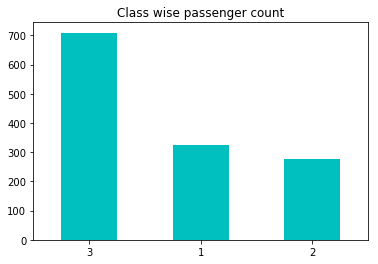

In [33]:
# Set title, rotation of labels and color of bar
df.Pclass.value_counts().plot(kind='bar',rot=0,title="Class wise passenger count",color='c');

## Distributions

In [34]:
# use hist to create histogram
#df.Age.plot(kind='hist',rot=0,title="Histogram for Age",color='c');

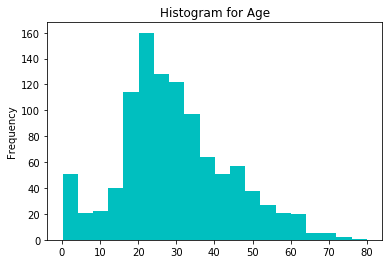

In [35]:
# Use bins parameter to add or remove bins
df.Age.plot(kind='hist',rot=0,title="Histogram for Age",color='c',bins=20);

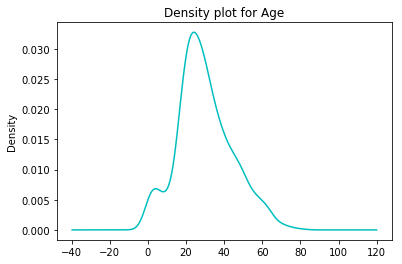

In [36]:
# use kde for density plot
df.Age.plot(kind='kde',title="Density plot for Age",color='c');

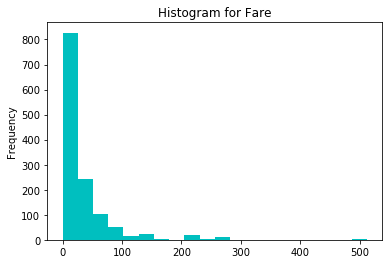

In [37]:
# histogram for fare
df.Fare.plot(kind='hist',rot=0,title="Histogram for Fare",color='c',bins=20);

In [38]:
print("Skewness for Age : {0:.2f}".format(df.Age.skew()))
print("Skewness for Fare : {0:.2f}".format(df.Fare.skew()))

Skewness for Age : 0.41
Skewness for Fare : 4.37


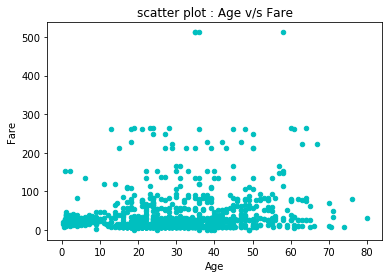

In [39]:
# use scatter plot for bi-variate distribution
df.plot.scatter(x='Age', y='Fare', color='c', title='scatter plot : Age v/s Fare');

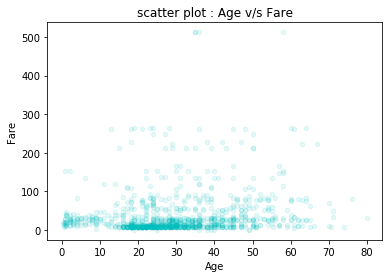

In [40]:
# use alpha to set transparency to see cluttered dots
df.plot.scatter(x='Age', y='Fare', color='c', title='scatter plot : Age v/s Fare', alpha=0.1);

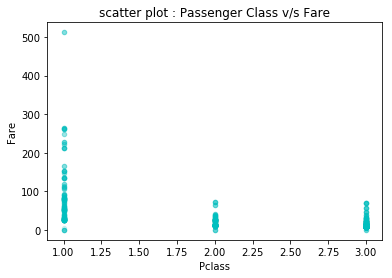

In [41]:
df.plot.scatter(x='Pclass', y='Fare', color='c', title='scatter plot : Passenger Class v/s Fare', alpha=0.15);

## Grouping and Aggregations

In [42]:
# group by
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [43]:
# group by
df.groupby('Pclass').Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [44]:
df.groupby('Pclass').Age.median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [45]:
df.groupby('Pclass')['Fare','Age'].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [46]:
df.groupby('Pclass').agg({'Fare':'mean', 'Age':'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [47]:
# more complicated aggregations
aggregations = {
    'Fare':{
        'mean_Fare': 'mean',
        'median_Fare': 'median',
        'max_Fare': max,
        'min_Fare':np.min
    },
    
    'Age':{
        'median_Age': 'median',
        'min_Age': min,
        'max_Age': max,
        'range_Age': lambda(x): max(x) - min(x)
    }
}

In [48]:
df.groupby('Pclass').agg(aggregations)

C:\Users\ABHISHEK\Anaconda3\envs\Py27\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                    Age                       \
        mean_Fare  max_Fare median_Fare min_Fare max_Age range_Age median_Age   
Pclass                                                                          
1       87.508992  512.3292     60.0000      0.0    80.0     79.08       39.0   
2       21.179196   73.5000     15.0458      0.0    70.0     69.33       29.0   
3       13.302889   69.5500      8.0500      0.0    74.0     73.83       24.0   

                
       min_Age  
Pclass          
1         0.92  
2         0.67  
3         0.17

In [49]:
df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

## Crosstabs

In [50]:
# Crosstab on Sex and Pclass
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


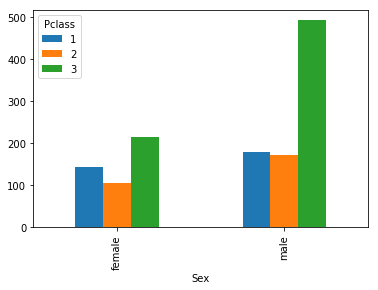

In [51]:
pd.crosstab(df.Sex, df.Pclass).plot(kind='bar');

## Pivot Tables

In [52]:
# pivot table
df.pivot_table(index='Sex', columns='Pclass', values='Age',aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [53]:
df.groupby(['Sex','Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [54]:
df.groupby(['Sex','Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


## Data Munging : Working with missing values

In [55]:
# use .info() to detect no of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


### Feature : Embarked

In [56]:
# Extract rows with Embarked value as NULL
df[df.Embarked.isnull()]
# Note that both these women survived

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [57]:
# how many people embarked at what points
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [58]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Embarked)
# Observe that Southampton(S) has highest no of Survivors

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [59]:
pd.crosstab(df[df.Survived != -888].Sex, df[df.Survived != -888].Embarked)
# Observe that Southampton is highest among females

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [60]:
# Thus, we can impute Embarked missing values with 'S'
# df.loc[df.Embarked.isnull(),'Embarked'] = 'S'
# df.Embarked.fillna('S', inplace=True)

In [61]:
# Option 2 : Explore the fare of each class for each embarkment point
df.groupby(['Pclass','Embarked']).Fare.median()
# Here we can see that the Fare for each row of missing embarked values is 80, they are from Pclass=1, and C has the closest 
#median fare to 80 which is 76.7293
# We can go ahead by filling C for missing embarked values

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [62]:
# replace missing values with 'C'
df.Embarked.fillna('C',inplace=True)

In [63]:
# Check for missing values
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [64]:
# Check for more missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


### Feature : Fare

In [65]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [66]:
median_fare = df.loc[(df.Pclass==3) & (df.Embarked=='S'),'Fare'].median()
print(median_fare)

8.05


In [67]:
df.Fare.fillna(median_fare,inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


### Feature : Age

In [69]:
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
30,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,3,male,0,0,349216
32,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,1,female,1,1,PC 17569
33,NaN,NaN,Q,7.7500,"Glynn, Miss. Mary Agatha",0,3,female,0,1,335677
37,NaN,NaN,C,7.2292,"Mamee, Mr. Hanna",0,3,male,0,1,2677


#### option 1 : Replace all missing values with mean Age

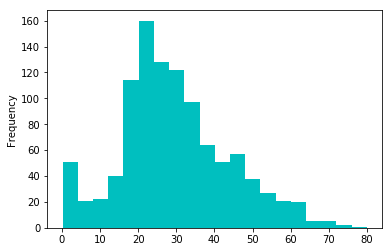

In [70]:
df.Age.plot(kind='hist', bins=20, color='c');

In [71]:
df.Age.mean()

29.881137667304014

#### issue due to some values in 70's and 80's pushing the mean up. Hence not a reliable imputation

#### option 2 : replace with median age of gender

In [72]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

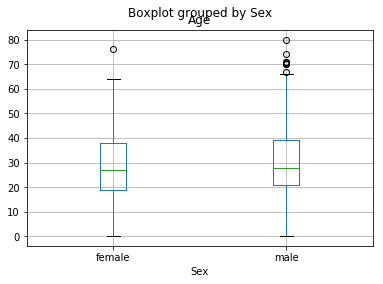

In [73]:
df[df.Age.notnull()].boxplot('Age','Sex')
# We can conclude from the boxplot that gender does not differentiate much in the Age distribution, hence not reliable
# df.Age.fillna(df.groupby('Sex').Age.transform('median'), inplace=True)

#### option 3 : replace median age of respective Pclass

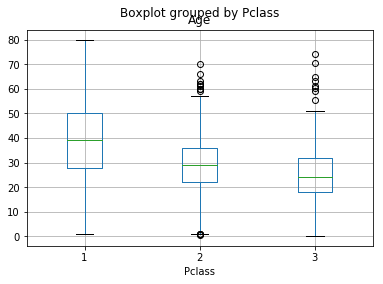

In [74]:
df[df.Age.notnull()].boxplot('Age', 'Pclass')
# This seems to be a better option for replacement than based on gender
# df.Age.fillna(df.groupby('Pclass').Age.transform('median'), inplace = True)

#### option 4 : replace with median age of title

In [75]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
8                          Palsson, Master. Gosta Leonard
9       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                    Nasser, Mrs. Nicholas (Adele Achem)
11                        Sandstrom, Miss. Marguerite Rut
12                               Bonnell, Miss. Elizabeth
13                         Saundercock, Mr. William Henry
14                            Andersson, Mr. Anders Johan
15                   Vestrom, Miss. Hulda Amanda Adolfina
16                       Hewlett, Mrs. (Mary D Kingcome) 
17                                   Rice, Master. Eugene
18

In [76]:
# Function to extract title from the name
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [77]:
# use map function to apply the function on each Name value
df.Name.map(GetTitle)

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
6           mr
7           mr
8       master
9          mrs
10         mrs
11        miss
12        miss
13          mr
14          mr
15        miss
16         mrs
17      master
18          mr
19         mrs
20         mrs
21          mr
22          mr
23        miss
24          mr
25        miss
26         mrs
27          mr
28          mr
29        miss
30          mr
         ...  
1280        mr
1281    master
1282        mr
1283       mrs
1284    master
1285        mr
1286        mr
1287       mrs
1288        mr
1289       mrs
1290        mr
1291        mr
1292      miss
1293        mr
1294      miss
1295        mr
1296        mr
1297        mr
1298        mr
1299        mr
1300      miss
1301      miss
1302      miss
1303       mrs
1304      miss
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [78]:
df.Name.map(GetTitle).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [79]:
def GetTitle(name):
    title_group = {
        'mr':'Mr',
        'mrs':'Mrs',
        'miss':'Miss',
        'master':'Master',
        'don':'Sir',
        'rev':'Sir',
        'dr':'Officer',
        'mme':'Mrs',
        'ms':'Mrs',
        'major':'Officer',
        'lady':'Lady',
        'sir':'Sir',
        'mlle':'Miss',
        'col':'Officer',
        'capt':'Officer',
        'the countess':'Lady',
        'jonkheer':'Sir',
        'dona':'Lady'
    }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [80]:
# Create Title feature
df['Title'] = df.Name.map(GetTitle)

In [81]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr


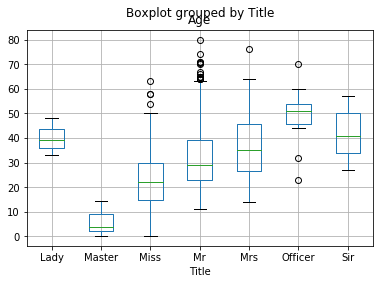

In [82]:
df[df.Age.notnull()].boxplot('Age','Title')
# We can see that Title is very good feature to replace the values for age

In [83]:
# Replacing missing Age values
df.Age.fillna(df.groupby('Title').Age.transform('median'), inplace=True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB


## Working with Outliers

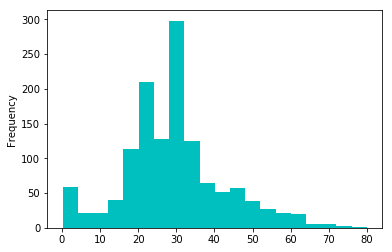

In [85]:
# histogam for age
df.Age.plot(kind='hist',bins=20,color='c')

In [86]:
df.loc[df.Age>70]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754,Mr
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369,Mr
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0,PC 17609,Mr
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1,27042,Mr
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0,347060,Mr
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,-888,19877,Mrs


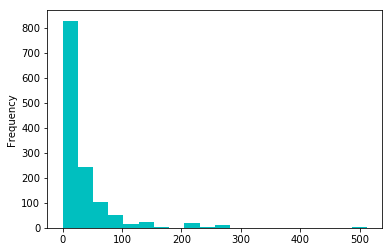

In [87]:
# histogram for fare
df.Fare.plot(kind='hist',bins=20,color='c')
# We can see that distribution is highly skewed

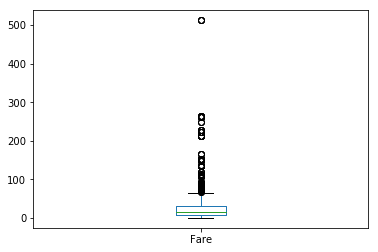

In [88]:
df.Fare.plot(kind='box')

In [89]:
# looking into outliers
df.loc[df.Fare == df.Fare.max()]
# Here it is interesting to note that all 4 have same ticket no,
#so they could be from the same family and booked the ticket at very last minute

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,Miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,Mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,Mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-888,PC 17755,Mrs


In [90]:
# Try some transformations to reduce skewness
LogFare = np.log(df.Fare+1.0) # Adding 1 to accomodate 0 fare as log(0) is not defined

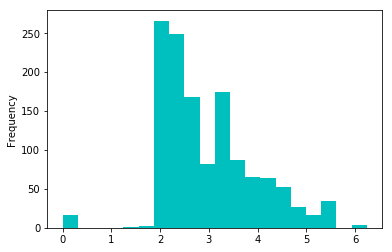

In [91]:
LogFare.plot(kind='hist',bins=20,color='c')
# This is much less skewed than before
#Lets try binning technique as well

In [92]:
#binning
pd.qcut(df.Fare,4) # It performs quantile based binning

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
6         (7.896, 14.454]
7       (31.275, 512.329]
8        (14.454, 31.275]
9         (7.896, 14.454]
10       (14.454, 31.275]
11       (14.454, 31.275]
12       (14.454, 31.275]
13        (7.896, 14.454]
14       (14.454, 31.275]
15        (-0.001, 7.896]
16       (14.454, 31.275]
17       (14.454, 31.275]
18        (7.896, 14.454]
19       (14.454, 31.275]
20        (-0.001, 7.896]
21       (14.454, 31.275]
22        (7.896, 14.454]
23        (7.896, 14.454]
24      (31.275, 512.329]
25       (14.454, 31.275]
26      (31.275, 512.329]
27        (-0.001, 7.896]
28      (31.275, 512.329]
29        (-0.001, 7.896]
30        (-0.001, 7.896]
              ...        
1280      (-0.001, 7.896]
1281     (14.454, 31.275]
1282    (31.275, 512.329]
1283    (31.275, 512.329]
1284     (14.454, 31.275]
1285      (7.896, 14.454]
1286     (14.454, 31.275]


In [93]:
pd.qcut(df.Fare,4,labels=['very_low','low','high','very_high']) #discretization

PassengerId
1        very_low
2       very_high
3             low
4       very_high
5             low
6             low
7       very_high
8            high
9             low
10           high
11           high
12           high
13            low
14           high
15       very_low
16           high
17           high
18            low
19           high
20       very_low
21           high
22            low
23            low
24      very_high
25           high
26      very_high
27       very_low
28      very_high
29       very_low
30       very_low
          ...    
1280     very_low
1281         high
1282    very_high
1283    very_high
1284         high
1285          low
1286         high
1287    very_high
1288     very_low
1289    very_high
1290     very_low
1291     very_low
1292    very_high
1293         high
1294    very_high
1295    very_high
1296         high
1297          low
1298          low
1299    very_high
1300     very_low
1301          low
1302     very_low
1303    very_hig

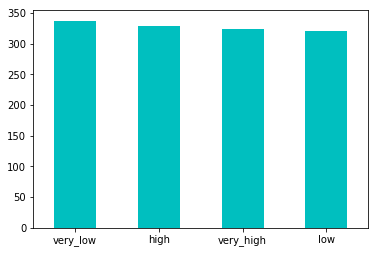

In [94]:
pd.qcut(df.Fare,4,labels=['very_low','low','high','very_high']).value_counts().plot(kind='bar',color='c',rot=0);

In [95]:
df["Fare_Bin"] = pd.qcut(df.Fare,4,labels=['very_low','low','high','very_high'])

## Feature Engineering

### Feature : Age State (Adult or Child)

In [96]:
df['AgeState'] = np.where(df.Age>=18,'Adult','Child')

In [97]:
df['AgeState'].value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [98]:
pd.crosstab(df[df.Survived!=-888].Survived,df[df.Survived!=-888].AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


### Feature : FamilySize

In [99]:
# Family : Adding parents with siblings
df['FamilySize'] = df.Parch + df.SibSp +1

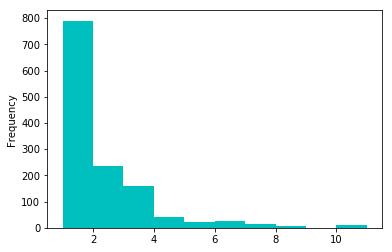

In [100]:
df.FamilySize.plot(kind='hist',color='c');

In [101]:
df.loc[df.FamilySize == df.FamilySize.max()]
# We can see that almost no one survived with a family of such huge size, so this feature could be a relevant one

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,FamilySize
PassengerId,,,,,,,,,,,,,,,
160,4.0,NaN,S,69.55,"Sage, Master. Thomas Henry",2,3,male,8,0,CA. 2343,Master,very_high,Child,11
181,22.0,NaN,S,69.55,"Sage, Miss. Constance Gladys",2,3,female,8,0,CA. 2343,Miss,very_high,Adult,11
202,29.0,NaN,S,69.55,"Sage, Mr. Frederick",2,3,male,8,0,CA. 2343,Mr,very_high,Adult,11
325,29.0,NaN,S,69.55,"Sage, Mr. George John Jr",2,3,male,8,0,CA. 2343,Mr,very_high,Adult,11
793,22.0,NaN,S,69.55,"Sage, Miss. Stella Anna",2,3,female,8,0,CA. 2343,Miss,very_high,Adult,11
847,29.0,NaN,S,69.55,"Sage, Mr. Douglas Bullen",2,3,male,8,0,CA. 2343,Mr,very_high,Adult,11
864,22.0,NaN,S,69.55,"Sage, Miss. Dorothy Edith ""Dolly""",2,3,female,8,0,CA. 2343,Miss,very_high,Adult,11
1080,22.0,NaN,S,69.55,"Sage, Miss. Ada",2,3,female,8,-888,CA. 2343,Miss,very_high,Adult,11
1234,29.0,NaN,S,69.55,"Sage, Mr. John George",9,3,male,1,-888,CA. 2343,Mr,very_high,Adult,11


In [102]:
pd.crosstab(df[df.Survived!=-888].Survived, df[df.Survived!=-888].FamilySize)
# We can see that as Family size increases, the survival rate is decreasing

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


### Feature : IsMother

In [103]:
# a lady with age more than 18, Parch>0 and is married
df['IsMother'] = np.where(((df.Sex=='female') & (df.Age>18) & (df.Parch>0) & (df.Title!='Miss')),1,0)

In [104]:
pd.crosstab(df[df.Survived!=-888].Survived,df[df.Survived!=-888].IsMother)
# We can see that more no of mothers survived that who didn't. So IsMother has some impact on survival.

IsMother,0,1
Survived,,
0,533,16
1,303,39


### Deck

In [105]:
df.Cabin

PassengerId
1               NaN
2               C85
3               NaN
4              C123
5               NaN
6               NaN
7               E46
8               NaN
9               NaN
10              NaN
11               G6
12             C103
13              NaN
14              NaN
15              NaN
16              NaN
17              NaN
18              NaN
19              NaN
20              NaN
21              NaN
22              D56
23              NaN
24               A6
25              NaN
26              NaN
27              NaN
28      C23 C25 C27
29              NaN
30              NaN
           ...     
1280            NaN
1281            NaN
1282            B24
1283            D28
1284            NaN
1285            NaN
1286            NaN
1287            C31
1288            NaN
1289            B41
1290            NaN
1291            NaN
1292             C7
1293            NaN
1294            NaN
1295            NaN
1296            D40
1297            D38
1298    

In [106]:
df.Cabin.unique()
# Here 'T' cabin no seems different. Let's explore further

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [107]:
# Looking into 'T' cabin
df.loc[df.Cabin=='T']
# In order to prevent creation of a different deck for the one passenger, we can
#assume that it was done by mistake, and change it to NAN

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,
340,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,1,male,0,0,113784,Mr,very_high,Adult,1,0


In [108]:
# changing cabin to NAN
df.loc[df.Cabin=='T','Cabin'] = np.NAN

In [109]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'C128', 'D37', 'B35',
       'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111', 'C92',
       'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20', 'B79',
       'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86', 'C70',
       'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19', 'D50',
       'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24', 'C90

In [110]:
# extract first character of cabin to deck
def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')
df['Deck'] = df["Cabin"].map(get_deck)

In [111]:
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [112]:
pd.crosstab(df[df.Survived!=-888].Survived,df[df.Survived!=-888].Deck)
# Deck does seem to have impact on survival

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
Age           1309 non-null float64
Cabin         294 non-null object
Embarked      1309 non-null object
Fare          1309 non-null float64
Name          1309 non-null object
Parch         1309 non-null int64
Pclass        1309 non-null int64
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      1309 non-null int64
Ticket        1309 non-null object
Title         1309 non-null object
Fare_Bin      1309 non-null category
AgeState      1309 non-null object
FamilySize    1309 non-null int64
IsMother      1309 non-null int32
Deck          1309 non-null object
dtypes: category(1), float64(2), int32(1), int64(5), object(8)
memory usage: 210.2+ KB


## Categorical Feature Encoding

In [114]:
# sex
df['IsMale'] = np.where(df.Sex=='male',1,0)

In [115]:
# columns Deck,Pclass,Title,AgeState
df = pd.get_dummies(df,columns=['Deck','Pclass','Title','Fare_Bin','Embarked','AgeState'])

In [116]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 39 columns):
Age                   1309 non-null float64
Cabin                 294 non-null object
Fare                  1309 non-null float64
Name                  1309 non-null object
Parch                 1309 non-null int64
Sex                   1309 non-null object
SibSp                 1309 non-null int64
Survived              1309 non-null int64
Ticket                1309 non-null object
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pcla

### Drop and ReOrder Columns

In [117]:
# drop columns
df.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'],axis=1,inplace=True)

In [118]:
# reorder columns
columns = [column for column in df.columns if column!='Survived']
columns = ['Survived'] + columns
df = df[columns]

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
Survived              1309 non-null int64
Age                   1309 non-null float64
Fare                  1309 non-null float64
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Title_Lady            1309 non-null uint8
Title_Master          1309 non-null uint8
Title_Miss            1309 non-null uint8
Title_Mr              1309 non-null uint8
Title_M

## Save Processed Data

In [120]:
get_processed_data_script_file = os.path.join(os.path.pardir,'src','data','get_processed_data.py')

In [121]:
processed_data_file_path = "C:/Users/ABHISHEK/titanic/data/processed/"
write_train_path = os.path.join(processed_data_file_path,'train.csv')
write_test_path = os.path.join(processed_data_file_path,'test.csv')

In [122]:
df.loc[df.Survived!=-888].to_csv(write_train_path)
columns = [column for column in df.columns if column!='Survived']
df.loc[df.Survived==-888,columns].to_csv(write_test_path)

### Advanced visualization using Matplotlib

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([  80.,   62.,  324.,  426.,  189.,  108.,   66.,   41.,   10.,    3.]),
 array([  0.17 ,   8.153,  16.136,  24.119,  32.102,  40.085,  48.068,
         56.051,  64.034,  72.017,  80.   ]),
 <a list of 10 Patch objects>)

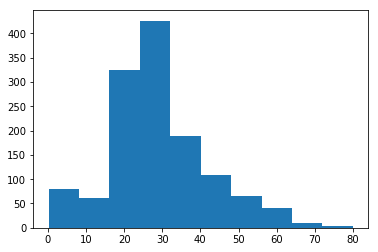

In [124]:
plt.hist(df.Age)

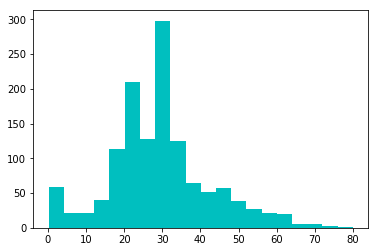

In [125]:
plt.hist(df.Age,bins=20,color='c')
plt.show()

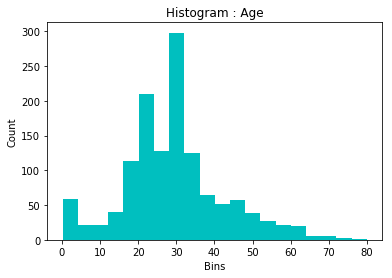

In [126]:
plt.hist(df.Age,bins=20,color='c')
plt.title("Histogram : Age")
plt.xlabel('Bins')
plt.ylabel('Count')
plt.show()

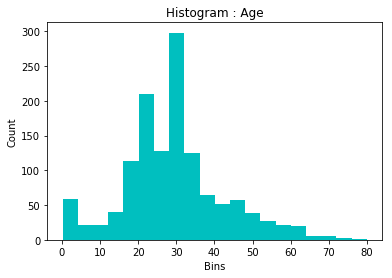

In [127]:
f, ax = plt.subplots()
ax.hist(df.Age,bins=20,color='c')
ax.set_title("Histogram : Age")
ax.set_xlabel("Bins")
ax.set_ylabel("Count")
plt.show()

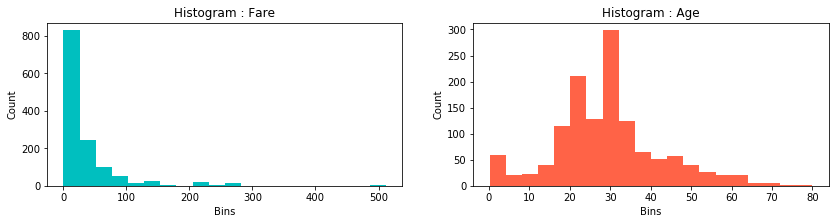

In [128]:
# Add subplots
f, (ax1, ax2) = plt.subplots(1,2,figsize=(14,3)) # 1 row and 2 columns
ax1.hist(df.Fare,bins=20,color='c')
ax1.set_title("Histogram : Fare")
ax1.set_xlabel("Bins")
ax1.set_ylabel("Count")

ax2.hist(df.Age,bins=20,color='tomato')
ax2.set_title("Histogram : Age")
ax2.set_xlabel("Bins")
ax2.set_ylabel("Count")

plt.show()

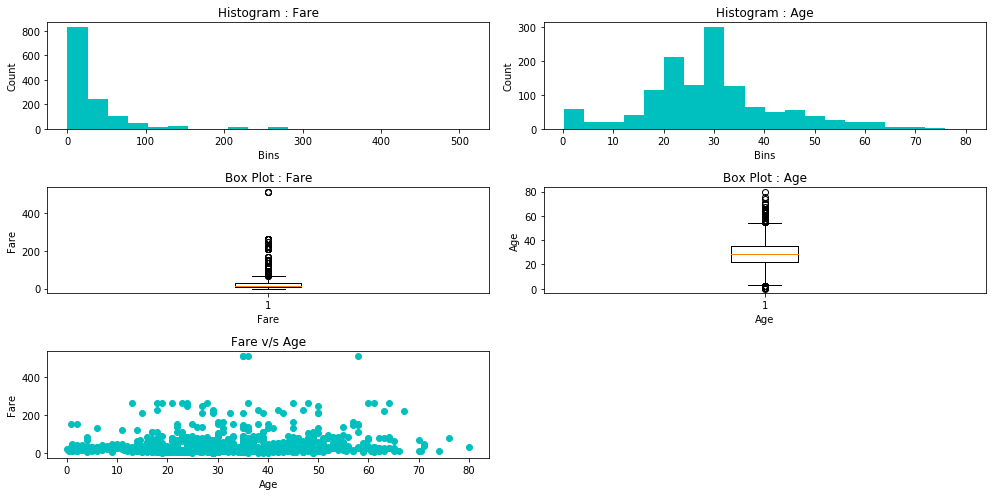

In [129]:
f, ax_arr = plt.subplots(3, 2, figsize=(14,7))

#Plot 1
ax_arr[0,0].hist(df.Fare,bins=20,color='c')
ax_arr[0,0].set_title("Histogram : Fare")
ax_arr[0,0].set_xlabel("Bins")
ax_arr[0,0].set_ylabel("Count")

#Plot 2
ax_arr[0,1].hist(df.Age,bins=20,color='c')
ax_arr[0,1].set_title("Histogram : Age")
ax_arr[0,1].set_xlabel("Bins")
ax_arr[0,1].set_ylabel("Count")

#Plot 3
ax_arr[1,0].boxplot(df.Fare.values)
ax_arr[1,0].set_title("Box Plot : Fare")
ax_arr[1,0].set_xlabel("Fare")
ax_arr[1,0].set_ylabel("Fare")

#Plot 4
ax_arr[1,1].boxplot(df.Age.values)
ax_arr[1,1].set_title("Box Plot : Age")
ax_arr[1,1].set_xlabel("Age")
ax_arr[1,1].set_ylabel("Age")

#Plot 5
ax_arr[2,0].scatter(x=df.Age, y=df.Fare,color='c')
ax_arr[2,0].set_title("Fare v/s Age")
ax_arr[2,0].set_xlabel("Age")
ax_arr[2,0].set_ylabel("Fare")

ax_arr[2,1].axis('off')
plt.tight_layout() # to remove overlapping

plt.show()